# Support Vector Machines

### Import modules

In [1]:
%matplotlib inline

import numpy
import pandas
from scipy import stats
import seaborn
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
seaborn.set(rc = {"figure.figsize":(10,7)})
seaborn.set_style("whitegrid")

### Example data

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
X, y = make_blobs(n_samples = 50, centers = 2,
                 random_state = 0, cluster_std = 0.60)

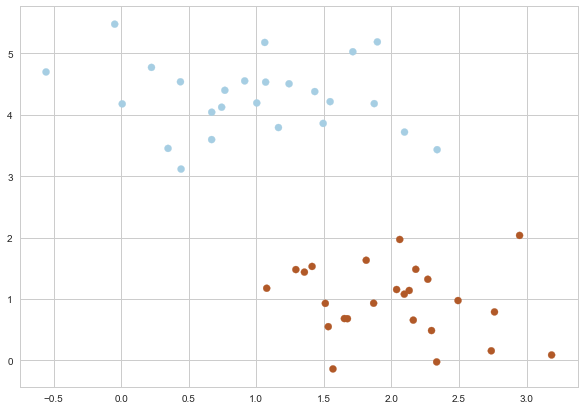

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "Paired")

### Support vector machines attempt to find the line which maximises margin between nearest points 

In [6]:
xfit = numpy.linspace(-1.3, 4)

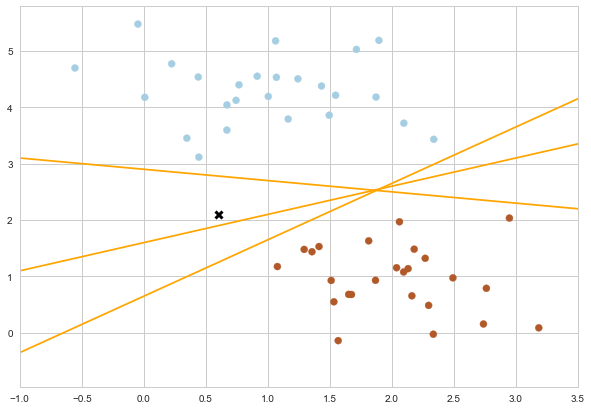

In [7]:
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = "Paired")
plt.plot([0.6], [2.1], "x", color = "black", markeredgewidth = 3, markersize = 7)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: 
    
    plt.plot(xfit, 
             m * xfit + b, '-k', 
             color = "orange")

    plt.xlim(-1, 3.5);

Depending on where the new point X is placed, the categorization label could be 
different based on the 3 lines which perfectly seperate the two classes.

The most ideal line maximises the margin between the points seperating the two classes, in this case the middle line.

In [8]:
xfit = numpy.linspace(-1, 3.5)

### Visualizing how support vector machines work

(-1, 3.5)

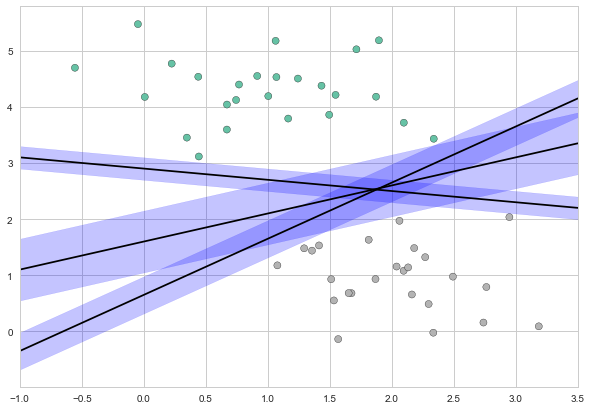

In [9]:
plt.scatter(X[:, 0], 
           X[:, 1],
           c = y,
           s = 50,
           cmap = "Set2",
           edgecolor = "black")

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    
    yfit = b + (m * xfit)
    plt.plot(xfit, yfit, "-k")
    plt.fill_between(xfit, yfit -d, yfit + d,
                    color = "blue",
                    alpha = 0.23)
    
plt.xlim(-1, 3.5)

#Note: middle line owns the largest margin to the nearest point(s)

### Fitting SVM 

In [10]:
from sklearn.svm import SVC

model = SVC(kernel = "linear",
           C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### SVM plotting function

In [11]:
def plot_svm_decision_function(model, ax = None, plot_support = True):
    
    if ax is None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Create grid to evaluate model
    x = numpy.linspace(xlim[0], xlim[1], 30)
    y = numpy.linspace(ylim[0], ylim[1], 30)
    Y, X = numpy.meshgrid(y, x)
    xy = numpy.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #Plot decision boundary and margins
    ax.contour(X, Y, P, colors = "green",
              levels = [-1, 0, 1], alpha = 0.5,
              linestyles = ["--", "-", "--"])
    
    #Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s = 300, linewidth = 1, facecolors = "none");
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

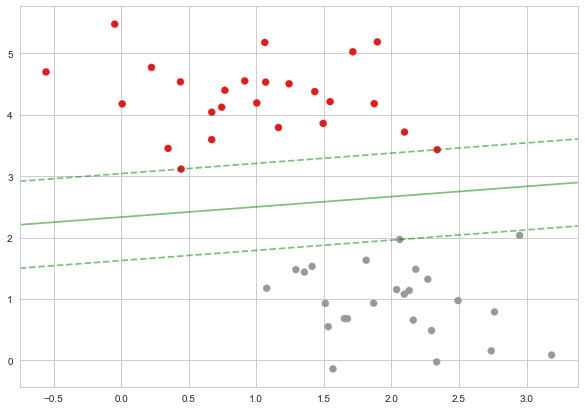

In [12]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "Set1")
plot_svm_decision_function(model)

### Calling `support_vectors_` attribute of model shows the points that define the svm, these points are the ones touching the boundary (dashed) lines

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### Non Linear SVM

In [14]:
from sklearn.datasets.samples_generator import make_circles

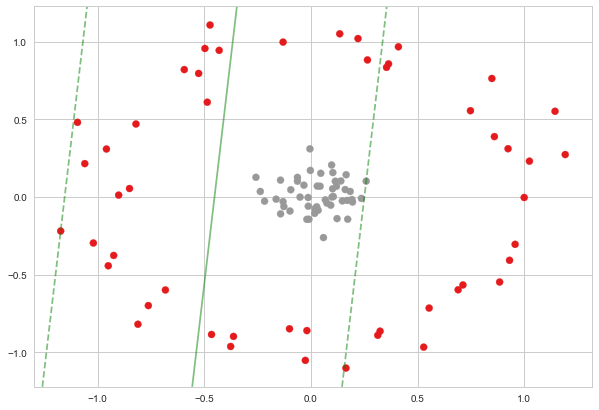

In [15]:
X, y = make_circles(n_samples = 100, factor = 0.1, noise = 0.1)
clf = SVC(kernel = "linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "Set1")
plot_svm_decision_function(clf, plot_support = False)

### View plot in 3d

In [16]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

In [17]:
r = numpy.exp(-( X**2).sum(1))

In [18]:
def plot3D(elevation = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = "Set1")
    ax.view_init(elev = elevation, azim = azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")

In [19]:
interact(plot3D, 
         elevation = [-10, 10], 
         azip = (-180, 180), 
         X = fixed(X), 
         y = fixed(y))

interactive(children=(Dropdown(description='elevation', options=(-10, 10), value=-10), IntSlider(value=30, des…

<function __main__.plot3D(elevation=30, azim=30, X=array([[-9.50660747e-01, -4.42915229e-01],
       [ 1.01647893e-01,  5.34164263e-02],
       [-2.37368230e-01,  3.61722968e-02],
       [ 1.22631717e-01, -1.38789590e-01],
       [ 1.84267726e-01,  3.60932351e-02],
       [ 1.14507325e+00,  5.52881199e-01],
       [-3.63201055e-01, -8.98245587e-01],
       [ 2.20887054e-01,  1.02173322e+00],
       [ 1.76390527e-02, -1.05145543e-01],
       [ 1.47471817e-01, -2.47920700e-02],
       [-5.26799645e-01,  7.96745001e-01],
       [ 3.37877020e-02, -8.52127686e-02],
       [ 2.59317878e-01,  1.02716017e-01],
       [ 9.57865953e-01, -3.04686597e-01],
       [-4.73206624e-01,  1.10890130e+00],
       [ 8.60673115e-01,  3.89741961e-01],
       [-1.30689106e-01, -2.91675563e-02],
       [-1.42620567e-01,  1.09028617e-01],
       [ 1.70588740e-01, -2.16775821e-02],
       [ 9.69595466e-02,  2.06742915e-01],
       [-4.97265887e-01,  9.57747304e-01],
       [-1.09501195e+00,  4.81470148e-01],
   

### Radial basis function
Avoids computing a basis function centered at every point in the dataset and having the SVM sift though potentially large amount of points.

In [20]:
clf = SVC(kernel = 'rbf',
         C  = 1E6)

In [21]:
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

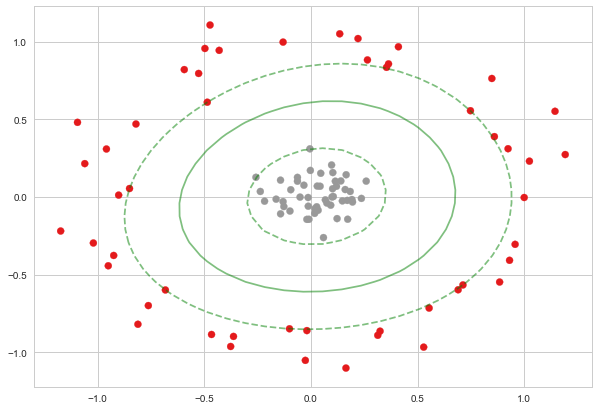

In [22]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "Set1")
plot_svm_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s = 300, lw = 1, facecolors = "none")

### Tuning SVM, softening margins for datasets with some degree of overlap

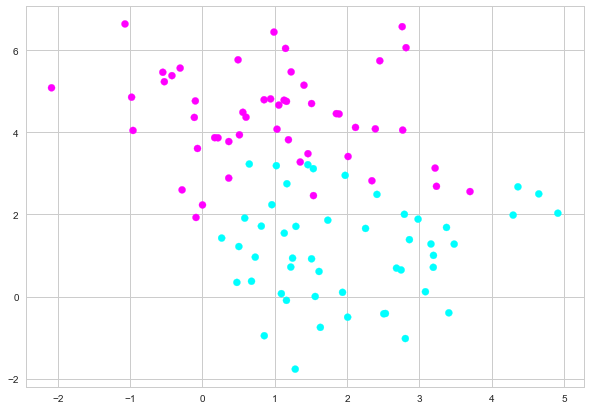

In [23]:
X, y = make_blobs(n_samples = 100,
                 centers = 2,
                 random_state = 0,
                 cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "cool_r")

### Decreasing the size of C parameter in SVM model allows more points to cross the margins, useful when there is a degree of overlap between labels

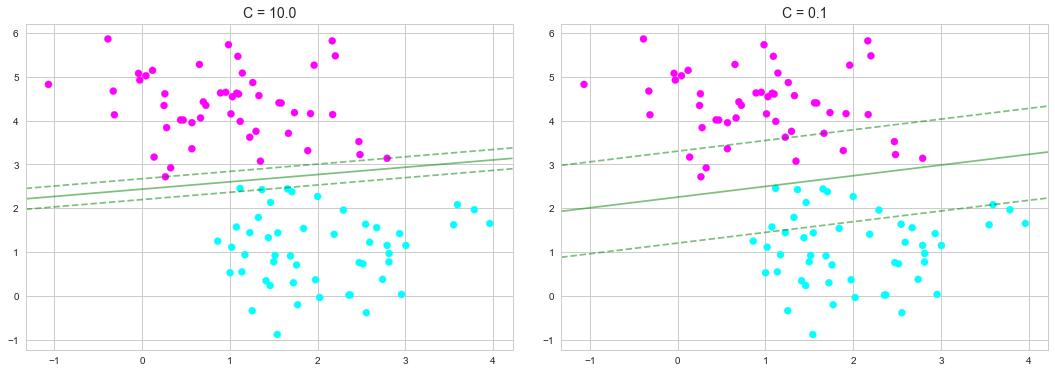

In [24]:
X, y = make_blobs(n_samples = 100,
                 centers = 2, 
                 random_state = 0,
                 cluster_std = 0.8)

fig, ax = plt.subplots(1, 2, figsize = (16,6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = "linear", C = C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = "cool_r")
    plot_svm_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s = 300, lw = 1, facecolors = "none")
    axi.set_title("C = {0:.1f}".format(C), size = 14)
    
    
    
    

### Face recognition example using SVM

In [25]:
from sklearn.datasets import fetch_lfw_people

In [26]:
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Exploring Faces dataset

In [27]:
import pandas

In [28]:
data = pandas.DataFrame(faces.data)

#### Data contains 1348 rows, 2914 features
- Each row contains information pertaining to a single image
- Each feature represents one pixel, since each image dimensions are [62x47]

In [29]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,138.000000,135.666672,127.666664,120.666664,117.000000,119.666664,126.000000,133.333328,138.000000,143.666672,...,113.000000,24.666666,4.666667,2.666667,1.333333,0.333333,1.333333,1.666667,1.666667,0.333333
1,71.333336,56.000000,67.666664,91.333336,91.666664,72.333336,101.666664,124.666664,124.333336,127.666664,...,236.666672,248.333328,252.666672,253.333328,253.000000,253.666672,251.666672,247.666672,243.000000,238.333328
2,84.333336,97.333336,72.333336,56.666668,95.333336,118.333336,123.666664,128.666672,130.333328,134.666672,...,83.333336,91.000000,106.666664,116.000000,123.000000,118.333336,102.000000,114.000000,194.333328,241.000000
3,68.333336,81.666664,121.666664,135.000000,138.666672,141.333328,142.000000,148.333328,159.666672,171.000000,...,90.000000,104.000000,165.000000,224.000000,232.333328,228.666672,230.000000,229.333328,224.333328,206.666672
4,56.666668,55.333332,47.333332,47.000000,50.000000,44.666668,44.666668,52.000000,62.333332,55.000000,...,41.666668,39.666668,37.333332,34.333332,34.000000,34.333332,34.333332,34.666668,35.666668,34.000000


In [30]:
data.shape

(1348, 2914)

#### There are 1348 membes in `faces.target`

In [31]:
len(faces.target)

1348

#### `target_names` shows the key values for each index within faces.target array

In [32]:
for name in faces.target_names:
    print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Junichiro Koizumi
Tony Blair


#### showing the unique values of `faces.target`

In [33]:
l = pandas.Series(faces.target)
print(l.unique())

[1 3 5 6 7 0 2 4]


### Preview faces

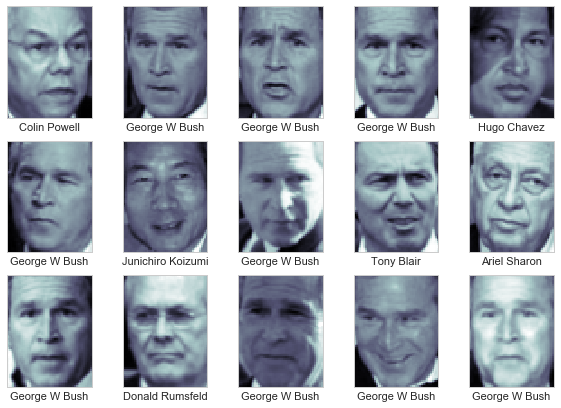

In [34]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = "bone")
    axi.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])

In [35]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

### Preprocess data using principal component analysis (PCA)

In [36]:
pca = PCA(svd_solver='randomized', n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = "rbf", class_weight = "balanced")
model = make_pipeline(pca, svc)

### Creating the train/test sets

In [37]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest  = train_test_split(faces.data, #faces feature matrix
                                                 faces.target, #faces target matrix
                                                 random_state = 42)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Optimizing the classifier using gridsearch cross validation

In [38]:
from sklearn.grid_search import GridSearchCV
param_grid = {"svc__C": [1, 5, 10, 50],
             "svc__gamma":[0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


CPU times: user 21.6 s, sys: 1.18 s, total: 22.7 s
Wall time: 16.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [39]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5,0.98,'Predicted names; incorrect labels are in red')

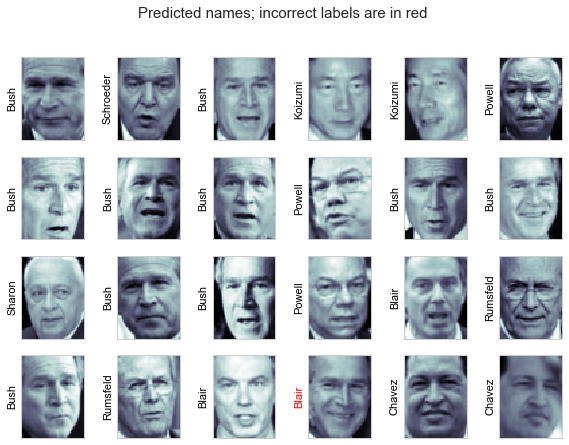

In [40]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap = "bone")
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color = "black" if yfit[i] == ytest[i] else "red")

fig.suptitle("Predicted names; incorrect labels are in red", size = 15)

### Classification report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

      avg / total       0.86      0.85      0.85       337



### Confusion Matrix

Text(158.74,0.5,'Predicted label')

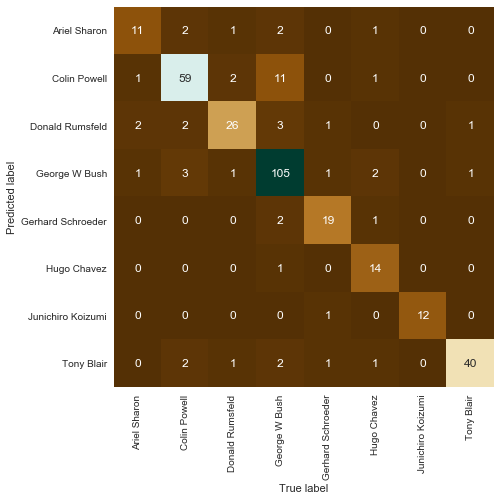

In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
seaborn.heatmap(mat.T, 
                square = True, 
                annot = True, 
                fmt = "d", 
                cmap = "BrBG",
                cbar = False,
                xticklabels = faces.target_names,
                yticklabels = faces.target_names)
plt.xlabel("True label")
plt.ylabel("Predicted label")


## Summary

### Advantages
- Take up little memory
- Once trained, model prediction is fast
- **Versatile** with the implementation of kernel methods to adapt to many data types
- Work well with **high dimensional data**

### Disadvantages

- Scaling can be computational with larger datasets
- Results strongly depend on value of C, the margin softening parameter. This parameter has to be chosen carefully through gridsearch cross validation
- Kernel models are sensitive to overfitting